In [267]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def create_df(path):
    df = pd.read_csv(path)
    return df
df= create_df("HR_comma_sepp.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [268]:
df.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [269]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [277]:
dfclean=df.drop(['department','salary'],axis=1)

from scipy import stats
dfclean=dfnumeric[(np.abs(stats.zscore(dfclean)) < 3).all(axis=1)]

dfclean['department']=df['department']
dfclean['salary']=df['salary']
print (dfnumeric)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36             0.56               2   
15      

In [278]:
dfnumeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14330 entries, 0 to 14998
Data columns (total 9 columns):
satisfaction_level       14330 non-null float64
last_evaluation          14330 non-null float64
number_project           14330 non-null int64
average_montly_hours     14330 non-null int64
time_spend_company       14330 non-null int64
Work_accident            14330 non-null int64
left                     14330 non-null int64
promotion_last_5years    14330 non-null int64
department               14330 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 1.1+ MB


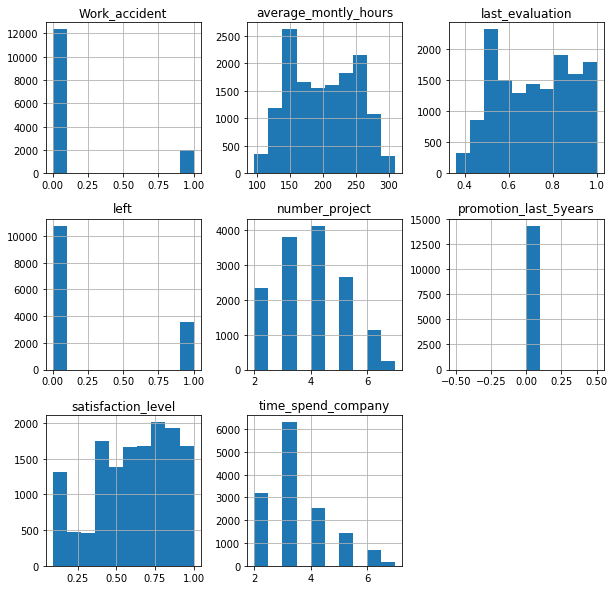

In [279]:
import matplotlib.pyplot as plt
dfclean.hist(figsize=(10,10))
plt.show()

In [282]:
def nan_columns(df):
    return df.columns[df.isnull().any()].tolist()
nan_col = nan_columns(dfclean)
print (nan_col)

[]


In [283]:
department_list=df['department'].unique()
print(department_list)

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [284]:
dfclean.groupby('department').mean()['satisfaction_level']

department
IT             0.616127
RandD          0.618827
accounting     0.576794
hr             0.598052
management     0.612238
marketing      0.617357
product_mng    0.619423
sales          0.611220
support        0.617126
technical      0.606991
Name: satisfaction_level, dtype: float64

In [285]:
salary_list=dfclean['salary'].unique()
print(salary_list)

['low' 'medium' 'high']


In [8]:
dfclean.groupby('salary').mean()['satisfaction_level']

salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction_level, dtype: float64

In [286]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
category=['category','object']
def categorical_columns(df):
    return df.select_dtypes(include=category).columns.values
categorical_cols=categorical_columns(dfclean)
print(categorical_cols)

['department' 'salary']


In [310]:
new_df1=df.drop(df[categorical_cols],axis=1)
for i in new_df1.columns.values:
    print ('%25s' % i, '%25s'%new_df1['left'].corr(new_df1[i]))

       satisfaction_level           -0.388374983424
          last_evaluation          0.00656712044753
           number_project           0.0237871850718
     average_montly_hours           0.0712871787833
       time_spend_company            0.144822174939
            Work_accident           -0.154621633705
                     left                       1.0
    promotion_last_5years          -0.0617881065792


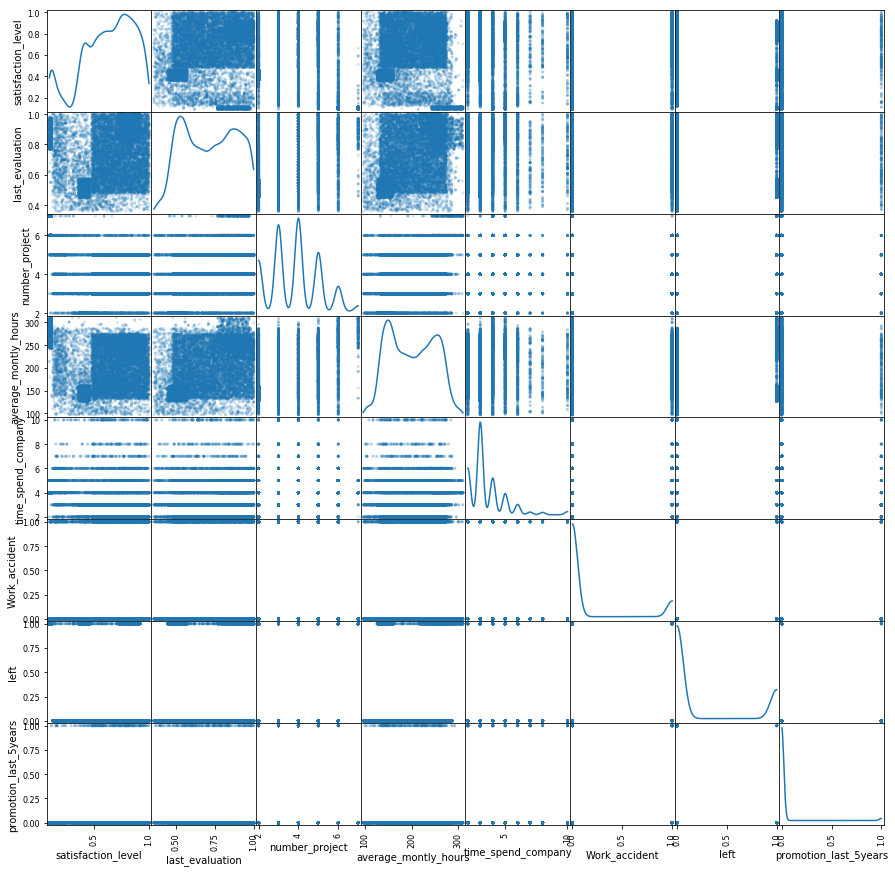

In [326]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

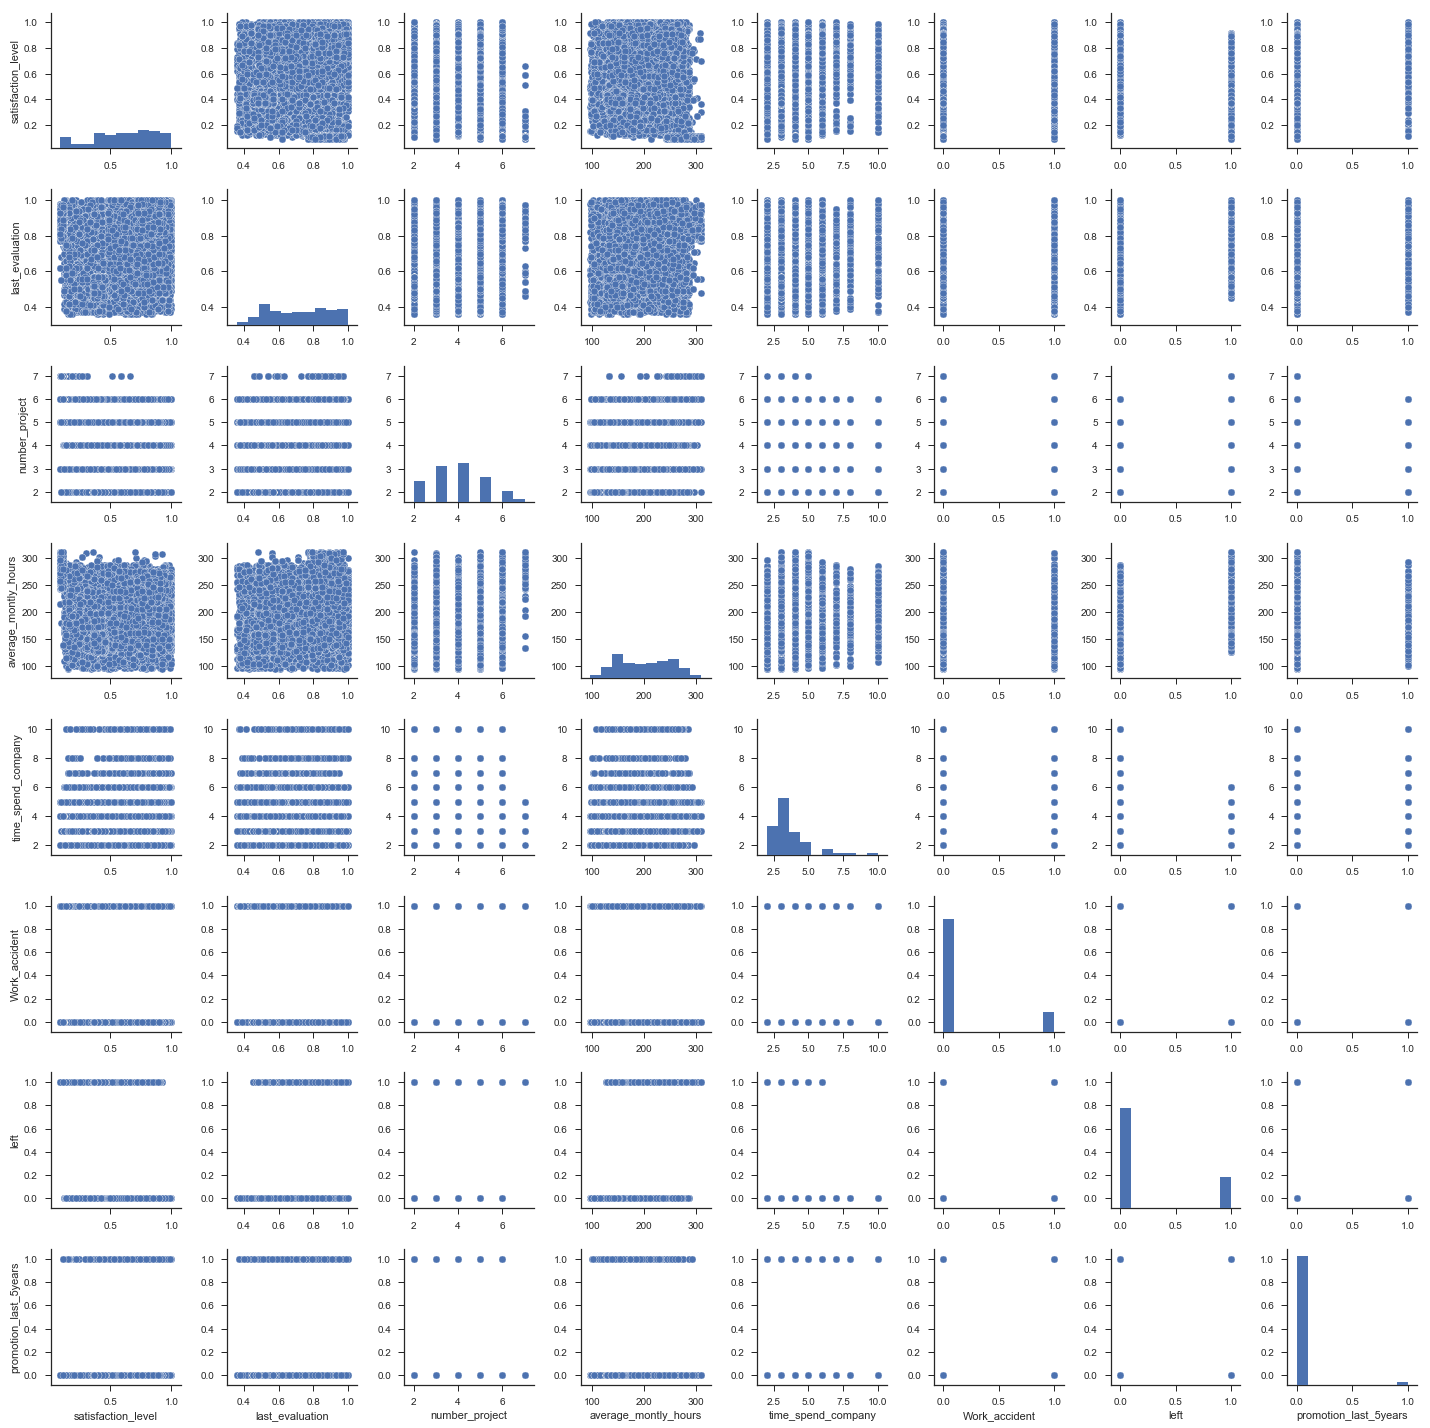

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
sns.pairplot(df)
plt.show()

In [311]:
def cat_to_num(new_df1, catcolumns):
    encoder = LabelEncoder()
    for i in catcolumns:
        cat = df[i]
        cat_encoded = encoder.fit_transform(cat)
    encoder_2 = OneHotEncoder()
    cat_1hot = encoder_2.fit_transform(cat_encoded.reshape(-1,1))
    categoryhot=cat_1hot.toarray()
    # modify dataframe
    df_cat = pd.get_dummies(new_df1[catcolumns])
    new_df1=new_df1.drop(new_df1[catcolumns],axis=1)
    new_df2 = new_df1.join(df_cat)
    return new_df2
df2=cat_to_num(df,categorical_cols)
print (df2)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36             0.56               2   
15      

In [312]:
for i in df2.columns.values:
    print ('%25s' % i, '%25s'%df2['left'].corr(df2[i]))

       satisfaction_level           -0.388374983424
          last_evaluation          0.00656712044753
           number_project           0.0237871850718
     average_montly_hours           0.0712871787833
       time_spend_company            0.144822174939
            Work_accident           -0.154621633705
                     left                       1.0
    promotion_last_5years          -0.0617881065792
            department_IT          -0.0109248273203
         department_RandD          -0.0465956511667
    department_accounting           0.0152011506677
            department_hr           0.0282487481159
    department_management          -0.0460353907057
     department_marketing        -0.000859304043676
   department_product_mng          -0.0110291520781
         department_sales          0.00992340703396
       department_support           0.0107001180129
     department_technical           0.0200761049344
              salary_high           -0.120929463756
            

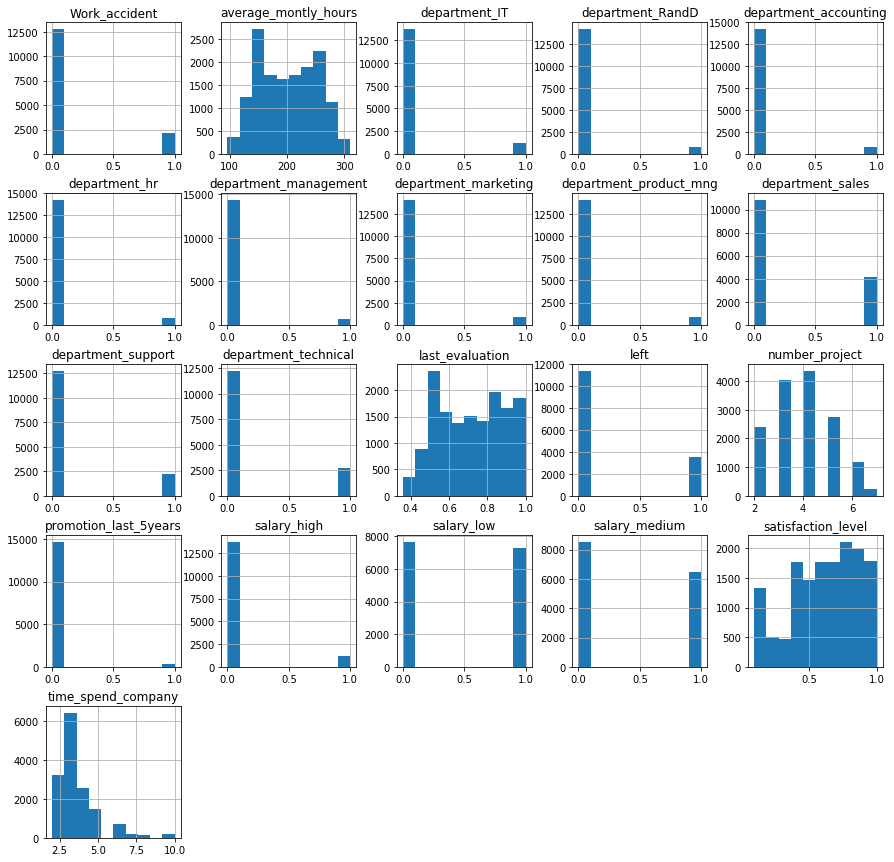

In [13]:
import matplotlib.pyplot as plt
df2.hist(figsize=(15,15))
plt.show()

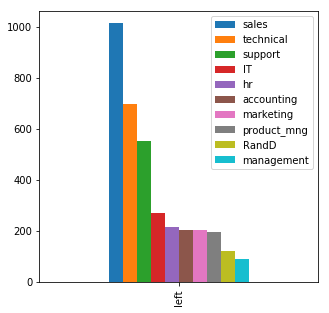

In [327]:
ayrilan = df[df['left'] == 1]['department'].value_counts()
df3 = pd.DataFrame([ayrilan])
df3.index = ['left']
df3.plot(kind = 'bar', figsize = (5, 5))
plt.show()

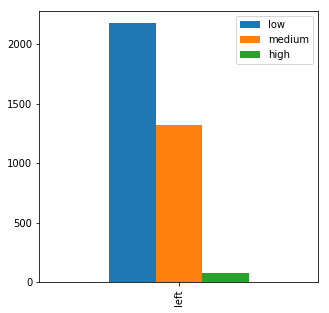

In [328]:
ayrilan = df[df['left'] == 1]['salary'].value_counts()
df3 = pd.DataFrame([ayrilan])
df3.index = ['left']
df3.plot(kind = 'bar', figsize = (5, 5))
plt.show()

In [346]:
def standardization(new_df2,label_col):
    from sklearn.preprocessing import StandardScaler
    new_df3 = new_df2.copy()
    column_std=new_df2.columns.difference([label_col]).values
    scale = new_df3[column_std]
    scale = StandardScaler().fit_transform(scale.values)
    new_df3[column_std] = scale
    return new_df3
df3=standardization(df2,'left')

In [408]:
from sklearn.model_selection import train_test_split
df4=df3.drop(['department_sales','department_IT','department_RandD'], axis=1)
def my_train_test_split(new_dataframe,label_column,test_ratio):
    np.random.seed(0)
    feauture_columns = new_dataframe[new_dataframe.columns.difference([label_column])].values
    label_column=new_dataframe[label_column].values
    X_train, X_test = train_test_split(feauture_columns, test_size=test_ratio)
    y_train, y_test = train_test_split(label_column, test_size=test_ratio)
    X_train, X_val, y_train, y_val = X_train[3750:],X_train[:3750],y_train[3750:],y_train[:3750]
    return X_train, X_val, y_train, y_val,X_test,y_test
X_train, X_val, y_train, y_val,X_test,y_test=my_train_test_split(df4,'left',0.25)
print (X_train, X_val, y_train, y_val,X_test,y_test)

[[-0.41116529  1.18037585 -0.23214788 ..., -0.8681323   0.27015461
   0.34365527]
 [-0.41116529  0.81995369 -0.23214788 ...,  1.15189816  0.59192776
  -0.34123516]
 [ 2.4321119  -0.82196952 -0.23214788 ..., -0.8681323   0.83325762
  -0.34123516]
 ..., 
 [-0.41116529  1.1603524  -0.23214788 ...,  1.15189816  0.31037625
  -1.0261256 ]
 [-0.41116529  0.69981296 -0.23214788 ..., -0.8681323   0.67237104
  -0.34123516]
 [-0.41116529  0.03903899 -0.23214788 ..., -0.8681323  -0.21250511
  -1.0261256 ]] [[ 2.4321119  -0.34140663 -0.23214788 ..., -0.8681323   1.23547405
  -0.34123516]
 [-0.41116529 -1.02220405 -0.23214788 ...,  1.15189816  1.43658227
  -1.0261256 ]
 [-0.41116529  0.45953152 -0.23214788 ..., -0.8681323   1.11480912
   1.02854571]
 ..., 
 [-0.41116529 -1.76307184 -0.23214788 ...,  1.15189816 -0.53427826
  -0.34123516]
 [-0.41116529 -1.10229787 -0.23214788 ...,  1.15189816 -0.93649469
  -0.34123516]
 [-0.41116529  0.88002405 -0.23214788 ..., -0.8681323  -2.02247906
   0.34365527]] 

In [ ]:
#df3=df2.drop(['department_sales','department_IT','department_RandD','Work_accident'], axis=1)

In [348]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression()
rfe = RFE(logisticreg, 8)
rfe = rfe.fit(X_train,y_train)
name=[]
for i in df2.columns.values:
    name.append(i)
outcome = rfe.get_support()
for i in range(0,len(outcome)-1):
    if outcome[i]:
        print (name[i])

print(rfe.support_)
print(rfe.ranking_)

number_project
average_montly_hours
promotion_last_5years
department_accounting
department_management
department_marketing
department_sales
salary_high
[False False  True  True False False False  True False False  True False
  True  True False  True False False  True False]
[13  8  1  1  7 11  6  1 12  2  1  3  1  1  5  1  9 10  1  4]


In [349]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)
#print(clf.feature_importances_ ) 

from sklearn.metrics import accuracy_score
y_pred1 =clf.predict(X_train)
accuracy_result=accuracy_score(y_train, y_pred1)
print (accuracy_result)

model = SelectFromModel(clf, prefit=True)
X_new_train = model.transform(X_train)
clf2 = ExtraTreesClassifier()
clf2=clf2.fit(X_new_train, y_train)

from sklearn.metrics import accuracy_score
y_pred2 =clf2.predict(X_new_train)
accuracy_result2=accuracy_score(y_train, y_pred2)
print (accuracy_result2)  

#result does not change very much

0.965728763835
0.963861848246


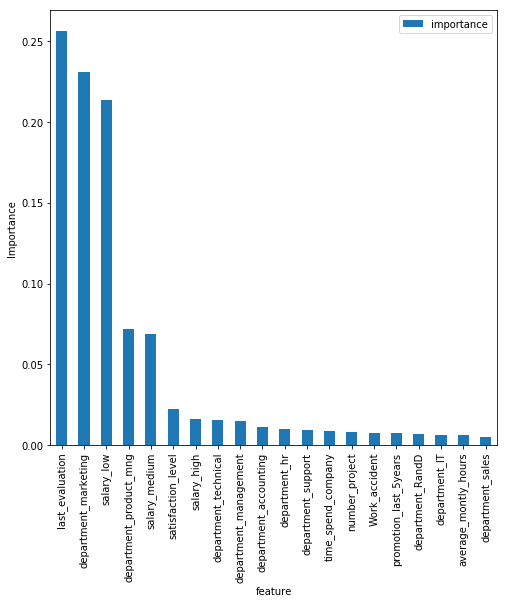

In [373]:
from sklearn.ensemble import RandomForestClassifier
x = df2.drop('left', axis = 1)
y = df2.left
randomforest = RandomForestClassifier(random_state=0)
randomforest = randomforest.fit(X_train,y_train)
feature_importance = pd.DataFrame()
feature_importance['feature'] = x.columns
feature_importance['importance'] = randomforest.feature_importances_

feature_importance.sort_values(by = ['importance'], ascending = False, inplace = True)
feature_importance.set_index('feature', inplace = True)
feature_importance.plot(kind = 'bar', figsize = (8,8))
plt.ylabel('Importance')
plt.show()

In [382]:
from sklearn.grid_search import GridSearchCV
print('GridSearch')
parameters = {"max_depth": [6,7,8,9,10]
            ,"min_samples_split" :[2,3,4,5]
            ,"n_estimators" : [10]
            ,"min_samples_leaf": [1,2,3,4,5]
            ,"max_features": (2,3,4)
            ,"bootstrap": [True, False]
            ,"criterion": ["gini", "entropy"]}
random = RandomForestClassifier()
model = GridSearchCV(random,parameters)
model_fit = model.fit(X_train, y_train)
learned_parameters = model_fit.best_params_
rfc = RandomForestClassifier(max_depth = learned_parameters["max_depth"]
                            ,max_features = learned_parameters['max_features']
                            ,min_samples_leaf = learned_parameters['min_samples_leaf']
                            ,min_samples_split = learned_parameters['min_samples_split']
                            ,bootstrap=learned_parameters['bootstrap']
                            ,criterion= learned_parameters['criterion']
                            ,n_estimators = 5000
                            ,n_jobs = 3)
model2 = rfc.fit(X_train, y_train)
print (model2.score(X_val, y_val))

GridSearch
0.764266666667


In [381]:
from sklearn.model_selection import RandomizedSearchCV
print('RandomSearch')
parameters = {"max_depth": [6,7,8,9,15]
            ,"min_samples_split" :[2,3,4,5,6]
            ,"n_estimators" : [10]
            ,"min_samples_leaf": [1,2,3,4,5]
            ,"max_features": (2,3,4)
            ,"bootstrap": [True, False]
            ,"criterion": ["gini", "entropy"]}
random = RandomForestClassifier()
model = RandomizedSearchCV(random,parameters)
model_fit = model.fit(X_train, y_train)
learned_parameters = model_fit.best_params_
rfc = RandomForestClassifier(max_depth = learned_parameters["max_depth"]
                            ,max_features = learned_parameters['max_features']
                            ,min_samples_leaf = learned_parameters['min_samples_leaf']
                            ,min_samples_split = learned_parameters['min_samples_split']
                            ,bootstrap=learned_parameters['bootstrap']
                            ,criterion= learned_parameters['criterion']
                            ,n_estimators = 5000
                            ,n_jobs = 3)
model2 = rfc.fit(X_train, y_train)
print (model2.score(X_val, y_val))

RandomSearch
0.764266666667


In [413]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
print('RandomSearch')
parameters = {"max_depth": [6,7,8,9,15]
            ,"min_samples_split" :[2,3,4,5,6]
            ,"n_estimators" : [10]
            ,"min_samples_leaf": [1,2,3,4,5]
            ,"max_features": (2,3,4)
            ,"bootstrap": [True, False]
            ,"criterion": ["gini", "entropy"]}
extra = ExtraTreesClassifier()
model = RandomizedSearchCV(random,parameters)
model_fit = model.fit(X_train, y_train)
learned_parameters = model_fit.best_params_
ext = ExtraTreesClassifier(max_depth = learned_parameters["max_depth"]
                            ,max_features = learned_parameters['max_features']
                            ,min_samples_leaf = learned_parameters['min_samples_leaf']
                            ,min_samples_split = learned_parameters['min_samples_split']
                            ,bootstrap=learned_parameters['bootstrap']
                            ,criterion= learned_parameters['criterion']
                            ,n_estimators = 5000
                            ,n_jobs = 3)
modelextra = ext.fit(X_train, y_train)
print (modelextra.score(X_val, y_val))

RandomSearch
0.764266666667


In [415]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators=500,random_state=0)
randomforest_classifier = randomforest_classifier.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_pred3 =randomforest_classifier.predict(X_test)
accuracy_result3=accuracy_score(y_test, y_pred3)
print(accuracy_result3)

0.728266666667


In [416]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred3)
tp = confusion_matrix[1, 1]
tn = confusion_matrix[0, 0]
fp = confusion_matrix[0, 1]
fn = confusion_matrix[1, 0]
precision = tn/(tn+fp)
recall = tp/float(fn+tp)
print ('Random Forest->  ','precision:',precision,'recall:',recall)

Random Forest->   precision: 0.941921858501 recall: 0.0605060506051


In [417]:
from sklearn.ensemble import ExtraTreesClassifier
extra_classifier = ExtraTreesClassifier(n_estimators=500)
extra_classifier.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_pred4 =extra_classifier.predict(X_test)
accuracy_result4=accuracy_score(y_test, y_pred4)
print (accuracy_result4)

0.7136


In [418]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred4)
tp = confusion_matrix[1, 1]
tn = confusion_matrix[0, 0]
fp = confusion_matrix[0, 1]
fn = confusion_matrix[1, 0]
precision = tn/(tn+fp)
recall = tp/float(fn+tp)
print ('Extra Trees Classifier->  ','precision:',precision,'recall:',recall)

Extra Trees Classifier->   precision: 0.917282646955 recall: 0.0770077007701


In [404]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression()
logisticreg.fit(X_train,y_train)
y_pred5 =logisticreg.predict(X_test)
accuracy_result5=accuracy_score(y_test, y_pred5)
print (accuracy_result5)

0.7576


In [405]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred5)
tp = confusion_matrix[1, 1]
tn = confusion_matrix[0, 0]
fp = confusion_matrix[0, 1]
fn = confusion_matrix[1, 0]
precision = tn/(tn+fp)
recall = tp/float(fn+tp)
print ('Logistic Regression->  ','precision:',precision,'recall:',recall)

Logistic Regression->   precision: 1.0 recall: 0.0


In [406]:
from sklearn.svm import SVC
svmclf = SVC()
svmclf.fit(X_train,y_train)
y_pred6 =svmclf.predict(X_test)
accuracy_result6=accuracy_score(y_test, y_pred6)
print (accuracy_result6)

0.7576


In [407]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred6)
tp = confusion_matrix[1, 1]
tn = confusion_matrix[0, 0]
fp = confusion_matrix[0, 1]
fn = confusion_matrix[1, 0]
precision = tn/(tn+fp)
recall = tp/float(fn+tp)
print ('SVC','precision:',precision,'recall:',recall)

SVC precision: 0.999648011264 recall: 0.001100110011


In [414]:
from sklearn.ensemble import VotingClassifier
randomclassifier = RandomForestClassifier(random_state=0,n_estimators=500)
extratreeclassifier=ExtraTreesClassifier(n_estimators=500)
logisticregresion = LogisticRegression()
combine = VotingClassifier(estimators=[('randomclassifier', randomclassifier), ('extratreeclassifier',extratreeclassifier)], voting='soft')
combine = combine.fit(X_train,y_train)
y_pred7 =combine.predict(X_test)
accuracy_result7=accuracy_score(y_test, y_pred7)
print (accuracy_result7)

0.7224


In [361]:
from sklearn.ensemble import VotingClassifier
randomclassifier = RandomForestClassifier(random_state=0,n_estimators=500)
extratreeclassifier=ExtraTreesClassifier(n_estimators=500)
logisticregresion = LogisticRegression()
combine = VotingClassifier(estimators=[('randomclassifier', randomclassifier), ('extratreeclassifier',extratreeclassifier),('logisticregresion',logisticregresion)], voting='soft')
combine = combine.fit(X_train,y_train)
y_pred7 =combine.predict(X_test)
accuracy_result7=accuracy_score(y_test, y_pred7)
print (accuracy_result7)

0.732533333333


In [422]:
from sklearn.metrics import accuracy_score
for i in (randomforest_classifier, extra_classifier, logisticreg, svmclf, combine):
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print(i.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.728266666667
ExtraTreesClassifier 0.714133333333
LogisticRegression 0.7576
SVC 0.757333333333
VotingClassifier 0.721066666667


In [420]:
randomforest_classifier.fit(X_train,y_train)
logisticreg.fit(X_train,y_train)
predictions = randomforest_classifier.predict_proba(X_val)
predictions2 =logisticreg.predict_proba(X_val)
import numpy as np
new_trainingset=np.concatenate((predictions, predictions2), axis=1)
print(new_trainingset)

[[ 0.7132      0.2868      0.73325423  0.26674577]
 [ 0.884       0.116       0.75027405  0.24972595]
 [ 0.8388      0.1612      0.74518412  0.25481588]
 ..., 
 [ 0.7505      0.2495      0.76271706  0.23728294]
 [ 0.9836      0.0164      0.75953681  0.24046319]
 [ 0.448       0.552       0.80708948  0.19291052]]


In [421]:
from sklearn.ensemble import RandomForestClassifier
blender = RandomForestClassifier()
blender = blender.fit(new_trainingset,y_val)
y_pred7 =blender.predict(new_trainingset)
accuracy_blender=accuracy_score(y_test, y_pred7)
print (accuracy_blender)

0.650133333333
